### Initialize data

In [1]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # Silence RDKit warnings

import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


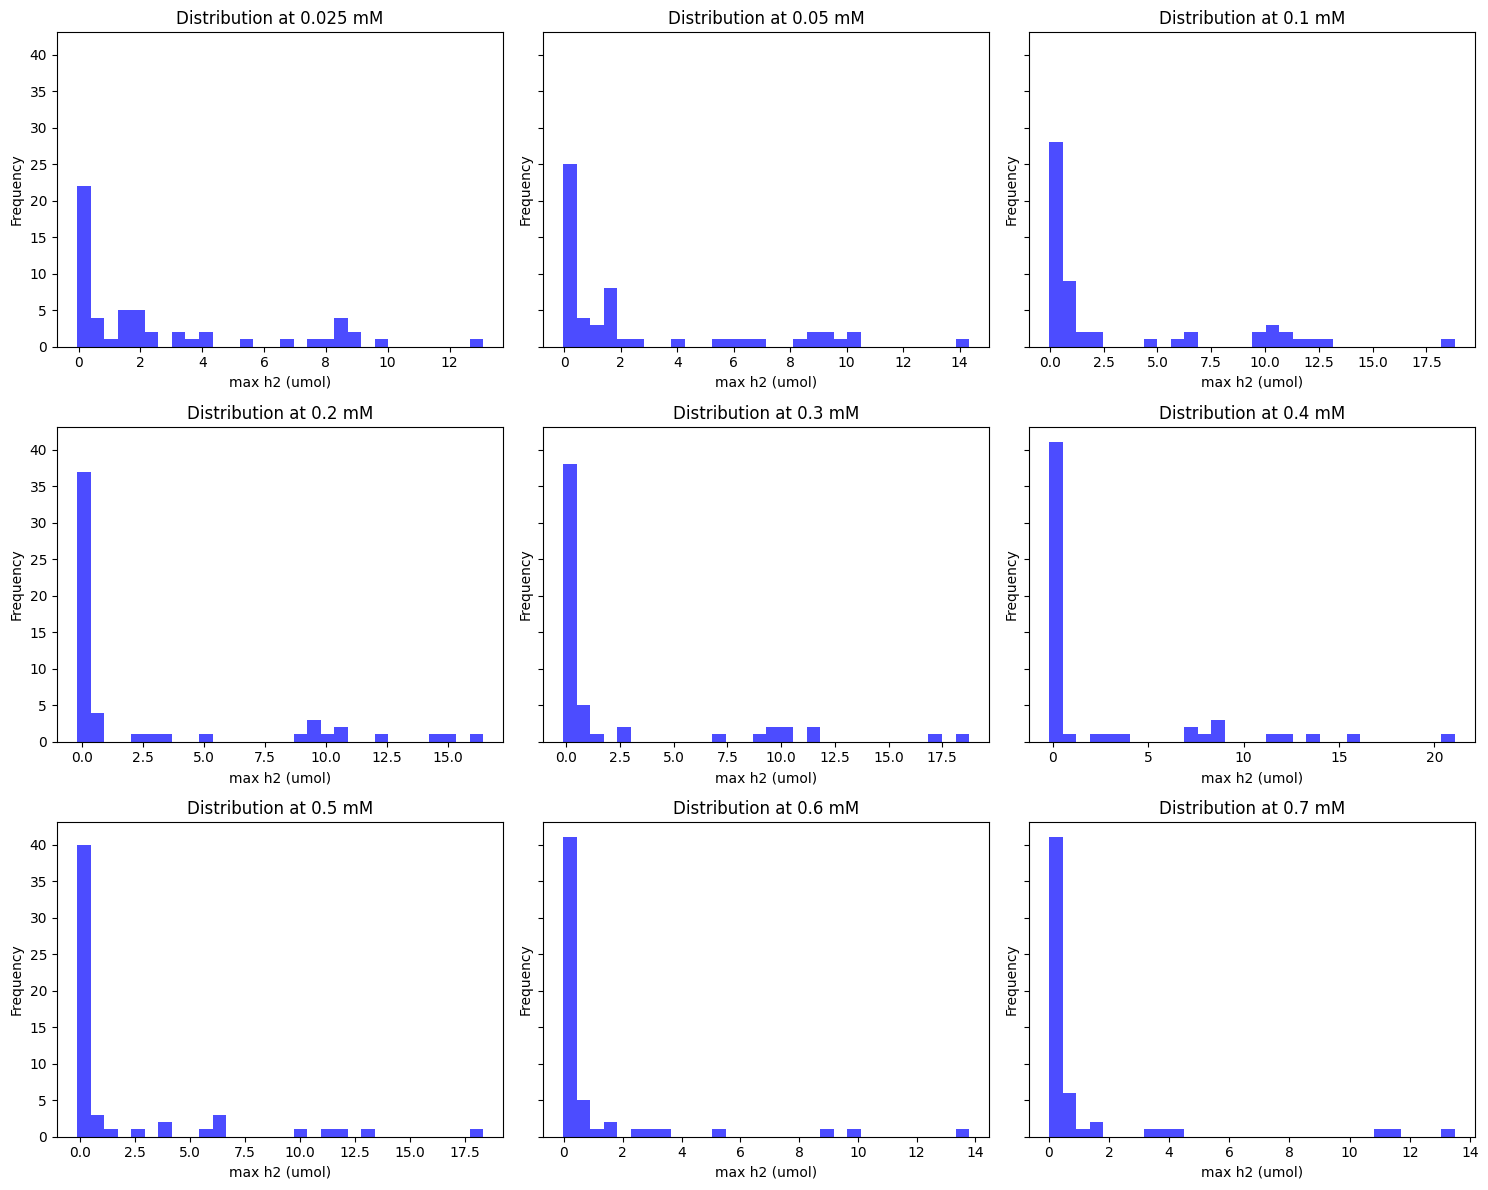

In [2]:
import matplotlib.pyplot as plt

concentrations = df['Ni conc [mM]'].unique()
n_conc = len(concentrations)

fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)
axes = axes.flatten()

for i, conc in enumerate(concentrations):
    ax = axes[i]
    subset = df[df['Ni conc [mM]'] == conc]
    subset['max h2 (umol)'].hist(bins=30, grid=False, color='blue', alpha=0.7, ax=ax)
    ax.set_xlabel('max h2 (umol)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution at {conc} mM')

# Hide unused subplots if any
for j in range(len(concentrations), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Summary statistics for each concentration as a pandas DataFrame

stats_data = []
for conc in sorted(concentrations):
    subset = df[df['Ni conc [mM]'] == conc]
    h2_vals = subset['max h2 (umol)']
    stats_data.append({
        'Concentration (mM)': conc,
        'Count': len(h2_vals),
        'Mean (μmol)': h2_vals.mean(),
        'Std (μmol)': h2_vals.std(),
        'Min (μmol)': h2_vals.min(),
        'Max (μmol)': h2_vals.max(),
        'Non-zero count': (h2_vals > 0).sum(),
        'Coefficient of Variation': h2_vals.std() / h2_vals.mean()
    })

stats_df = pd.DataFrame(stats_data)
stats_df

,Concentration (mM),Count,Mean (μmol),Std (μmol),Min (μmol),Max (μmol),Non-zero count,Coefficient of Variation
0,0.025,56,2.674816,3.365995,-0.042683,13.085681,55,1.258402
1,0.050,56,2.603952,3.653703,-0.042815,14.336694,55,1.403137
2,0.100,56,3.015525,4.610920,-0.033609,18.832912,54,1.529060
3,0.200,56,2.648345,4.681023,-0.195419,16.425882,53,1.767528
4,0.300,56,2.314391,4.562441,-0.152435,18.751163,49,1.971336
5,0.400,56,2.477710,4.740133,-0.195419,21.083450,51,1.913111
6,0.500,56,1.948237,3.921194,-0.113090,18.336289,48,2.012688
7,0.600,56,1.099250,2.558193,-0.026901,13.784412,54,2.327218
8,0.700,56,1.155022,2.724836,0.011934,13.504761,56,2.359120


In [4]:
# Filter out ligands with no activity
df_filtered = df[df['max h2 (umol)'] >= 0.5]
#df_filtered = df
df_filtered

,Ligand Name,CAS,SMILES,Sample ID,Ni conc [mM],Well Row (0-indexed),Well Column (0-indexed),0,30,60,...,870,900,930,960,990,1020,1050,1080,1110,max h2 (umol)
3,2-Mercaptonicotinic acid,38521-46-9,[O-]C(=O)c1cccnc1[S-],L2,0.025,0,1,-0.195419,-0.019767,0.265820,...,1.974575,2.286667,2.415076,2.699777,2.932207,3.241801,3.465248,3.753974,4.068596,4.068596
4,3-Aminopyridine-2(1H)-thione,38240-21-0,C1=CNC(=S)C(=C1)N,L3,0.025,0,2,-0.195419,-0.139284,0.037127,...,3.927982,4.563381,5.013864,5.565616,6.171127,6.913282,7.537440,8.266589,9.021096,9.021096
5,2-Mercapto-6-methylpyridine,18368-57-5,Cc1cccc(S)n1,L4,0.025,0,3,-0.195419,-0.027155,-0.004378,...,4.041246,4.600444,5.106469,5.592967,6.145826,6.787368,7.238966,7.978657,8.495097,8.495097
6,3-Bromo-6-mercaptopyridine,56673-34-8,C1=CC(=S)NC=C1Br,L5,0.025,0,4,-0.195419,-0.090234,-0.166809,...,3.526215,4.007917,4.395415,4.857900,5.318898,5.835322,6.362200,6.960343,7.491785,7.491785
7,6-Mercaptonicotinonitrile,27885-58-1,C1=CC(=S)NC=C1C#N,L6,0.025,0,5,-0.195419,-0.086162,-0.071547,...,4.137825,4.678774,5.134172,5.681852,6.232149,6.811899,7.343442,8.064902,8.625834,8.625834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ethyl piperidine-3-carboxylate,5006-62-2,CCOC(=O)C1CCCNC1,L35,0.700,8,1,-0.195419,0.066474,0.368405,...,0.492288,0.489264,0.471846,0.552176,0.370059,0.512858,0.456206,0.393621,0.473770,0.555013
482,"2,2′-Bipyridyl",366-18-7,c1ccc(nc1)c2ccccn2,L36,0.700,8,2,-0.195419,0.176814,0.513108,...,0.607341,0.546359,0.565758,0.595526,0.468779,0.606608,0.523284,0.494987,0.487824,0.659100
489,"1,3,5 benzene tricarboxylic acid",554-95-0,OC(=O)c1cc(cc(c1)C(O)=O)C(O)=O,L43,0.700,8,9,-0.195419,0.220902,0.570997,...,0.700215,0.771225,0.779157,0.782251,0.629324,0.737090,0.675573,0.658206,0.740157,0.822929
501,3-mercaptopropionic acid,107-96-0,OC(=O)CCS,L55,0.700,8,10,-0.195419,-0.104664,-0.017845,...,5.640240,6.359960,7.091426,7.613325,8.380821,9.175294,9.741481,10.463428,11.290852,11.290852


In [5]:
from rdkit import Chem
smiles = df['SMILES'].unique().tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
mol_names = df['Ligand Name'].unique().tolist()
mol_dict = {mol_names[i]: smiles[i] for i in range(len(smiles))}

In [6]:
from utils.utils import generate_fingerprints, calculate_descriptors

# Fingerprints
fp_results = []
for i in range(len(mols)):
    fp = generate_fingerprints(mols[i])
    fp_results.append(fp)

# Moelcular descriptors (rdkit)
from utils.utils import calculate_descriptors
    
# Calculate descriptors for our ligand dataset
descriptor_data = []
for name, smiles in mol_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    desc = calculate_descriptors(mol, name)
    descriptor_data.append(desc)

df_desc = pd.DataFrame(descriptor_data)

### Preliminary ML models

We will start with the following models:
1. Baysian Ridge
2. Random Forest
3. SVR
4. Guassian Process

In [7]:
# Use concentrations corresponding to max H2 production for each ligand

# Use all concentrations for all ligands
df_model = df_filtered[['Ligand Name', 'max h2 (umol)', 'Ni conc [mM]']]
print(f'Shape of df_model: {df_model.shape}')

# Use one concentration for all ligands
df_model_01 = df_model[df_model['Ni conc [mM]'] == 0.1]
print(f'Shape of df_model_01: {df_model_01.shape}')
df_model_01.head()

Shape of df_model: (181, 3)
Shape of df_model_01: (28, 3)


,Ligand Name,max h2 (umol),Ni conc [mM]
112,"1,2-Benzenedithiol",0.706525,0.1
115,2-Mercaptonicotinic acid,10.366413,0.1
116,3-Aminopyridine-2(1H)-thione,6.285898,0.1
117,2-Mercapto-6-methylpyridine,11.916718,0.1
118,3-Bromo-6-mercaptopyridine,10.921355,0.1


Merge molecular descriptors with experimental data

In [8]:
import numpy as np

# Merge molecular descriptors with experimental data
ml_data = df_model_01.set_index('Ligand Name').join(df_desc.set_index('Name'))
ml_data.reset_index(inplace=True)
print(ml_data.shape)

# Add fingerprint features (using your existing fp_results)
fingerprint_features = []
for i, name in enumerate(mol_names):
    fp_data = {'Ligand Name': name}
    
    # Use Morgan fingerprint bits (first 50 most variable bits)
    morgan_bits = np.array(fp_results[i]['Morgan'])
    # Select bits with some variance
    bit_variance = []
    for bit_idx, bit_val in enumerate(morgan_bits):
        # This is simplified - in practice, calculate variance across all molecules
        fp_data[f'morgan_bit_{bit_idx}'] = bit_val
    
    fingerprint_features.append(fp_data)

fp_df = pd.DataFrame(fingerprint_features)
ml_data = ml_data.merge(fp_df, on='Ligand Name', how='left')

print(ml_data.shape)
pd.set_option('display.max_columns', None)
ml_data.head()

(28, 220)
(28, 2268)


Ligand Name  max h2 (umol)  Ni conc [mM]  \
0            1,2-Benzenedithiol       0.706525           0.1   
1      2-Mercaptonicotinic acid      10.366413           0.1   
2  3-Aminopyridine-2(1H)-thione       6.285898           0.1   
3   2-Mercapto-6-methylpyridine      11.916718           0.1   
4    3-Bromo-6-mercaptopyridine      10.921355           0.1   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           4.849074        4.849074           0.766204        0.766204   
1          10.203981       10.203981           0.030093       -1.279537   
2           5.384398        5.384398           0.604167        0.604167   
3           4.042994        4.042994           0.782407        0.782407   
4           4.795278        4.795278           0.757593        0.757593   

        qed    SPS    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.500796  9.000  140.232         136.200  139.976539                   42   
1  0.503007  9.200  153.162         150.138  152.989546                   52   
2  0.514742  9.000  126.184         120.136  126.025169                   42   
3  0.520394  9.250  125.196         118.140  125.029920                   42   
4  0.621121  9.125  190.065         186.033  188.924782                   42   

   NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                    0         -0.063856         -0.781082   
1                    0          0.071478         -0.759551   
2                    0          0.125988         -0.396337   
3                    0          0.093203         -0.247099   
4                    0          0.102769         -0.351773   

   MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0             0.781082             0.063856             0.875   
1             0.759551             0.071478             1.700   
2             0.396337             0.125988             1.625   
3             0.247099             0.093203             1.500   
4             0.351773             0.102769             1.500   

   FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
0             1.250             1.500    32.120036     10.363192   
1             2.400             2.800    32.116921     10.283593   
2             2.375             2.750    32.091993     10.440586   
3             2.250             2.625    32.116920     10.388832   
4             2.250             2.625    79.918731     10.512661   

   BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
0      1.678163     -2.161606       2.036896       -1.730154     7.618950   
1      1.896592     -2.106985       2.005033       -2.228056     7.583126   
2      1.797587     -1.868163       1.972955       -1.849583     7.711953   
3      1.825238     -1.887992       1.998545       -1.773603     7.797546   
4      1.778363     -1.836013       2.037651       -1.686580     9.102976   

   BCUT2D_MRLOW    AvgIpc  BalabanJ     BertzCT      Chi0     Chi0n     Chi0v  \
0      1.266056  1.768177  3.134862  162.638339  5.983128  4.125898  5.758891   
1     -0.254898  1.878745  3.152941  261.679658  7.560478  4.904009  5.720506   
2      1.303289  1.768177  3.346607  227.870321  5.983128  4.217649  5.034146   
3      1.071164  1.642371  3.077660  168.388339  5.983128  4.626478  5.520905   
4      1.281364  1.769973  3.223015  209.620321  5.983128  4.018264  6.420757   

       Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3n     Chi3v  \
0  3.804530  2.235599  3.052095  1.446735  2.326388  0.849162  1.690363   
1  4.715214  2.549520  2.957768  1.643573  2.030271  0.991069  1.316392   
2  3.804530  2.236816  2.645065  1.454587  1.862835  0.848625  1.202178   
3  3.787694  2.414837  2.862051  1.637167  2.095366  0.873626  1.122698   
4  3.787694  2.131140  3.332387  1.371144  2.726646  0.746243  1.493428   

      Chi4n     Chi4v  HallKierAlpha         Ipc    Kappa1    Kappa2  \
0  0.450170  0.743388          -0.34   72.495266  5.79054

### Preprocessing and data initialization
Prepare features for training. Will start with just molecular descriptors (excluding substructure descriptors), then consider fingerprints (This was considered but it did not appear to provide any significant increase in predictive performance).

In [9]:
from sklearn.model_selection import train_test_split

# Sublist for feature groups (molecular, substructure, fingerprint)
molecular_cols = df_desc.columns.tolist()
molecular_cols.remove('Name')
fingerprint_cols = [col for col in ml_data.columns if 'morgan_bit_' in col]

# Select columns for features
#feature_cols = molecular_cols + fingerprint_cols
feature_cols = molecular_cols

# Prepare features using only molecular descriptors first
X = ml_data[feature_cols]
y = ml_data['max h2 (umol)']

print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(X)}")
print(f"Target distribution: mean={y.mean():.2f}, std={y.std():.2f}")

Features: 217
Samples: 28
Target distribution: mean=5.86, std=5.15


### Feature Engineering and Correlation Analysis
Remove highly correlated features and select most important features to reduce overfitting

In [10]:
# Check for and remove constant features (zero variance)
X_features_check = ml_data[feature_cols]
feature_variances = X_features_check.var()

# Find features with zero or near-zero variance
zero_var_features = feature_variances[feature_variances < 1e-10].index.tolist()

if zero_var_features:
    print(f"Found {len(zero_var_features)} constant/near-constant features:")
    
    # Remove these features
    feature_cols = [col for col in feature_cols if col not in zero_var_features]
    print(f"\nRemoved constant features. Remaining features: {len(feature_cols)}")
else:
    print("No constant features found. All features have variance.")

print(f"\nFinal feature count for correlation analysis: {len(feature_cols)}")

Found 62 constant/near-constant features:

Removed constant features. Remaining features: 155

Final feature count for correlation analysis: 155


Correlation-Based Selection:
  Original features: 155
  Features dropped: 56
  Features kept: 99


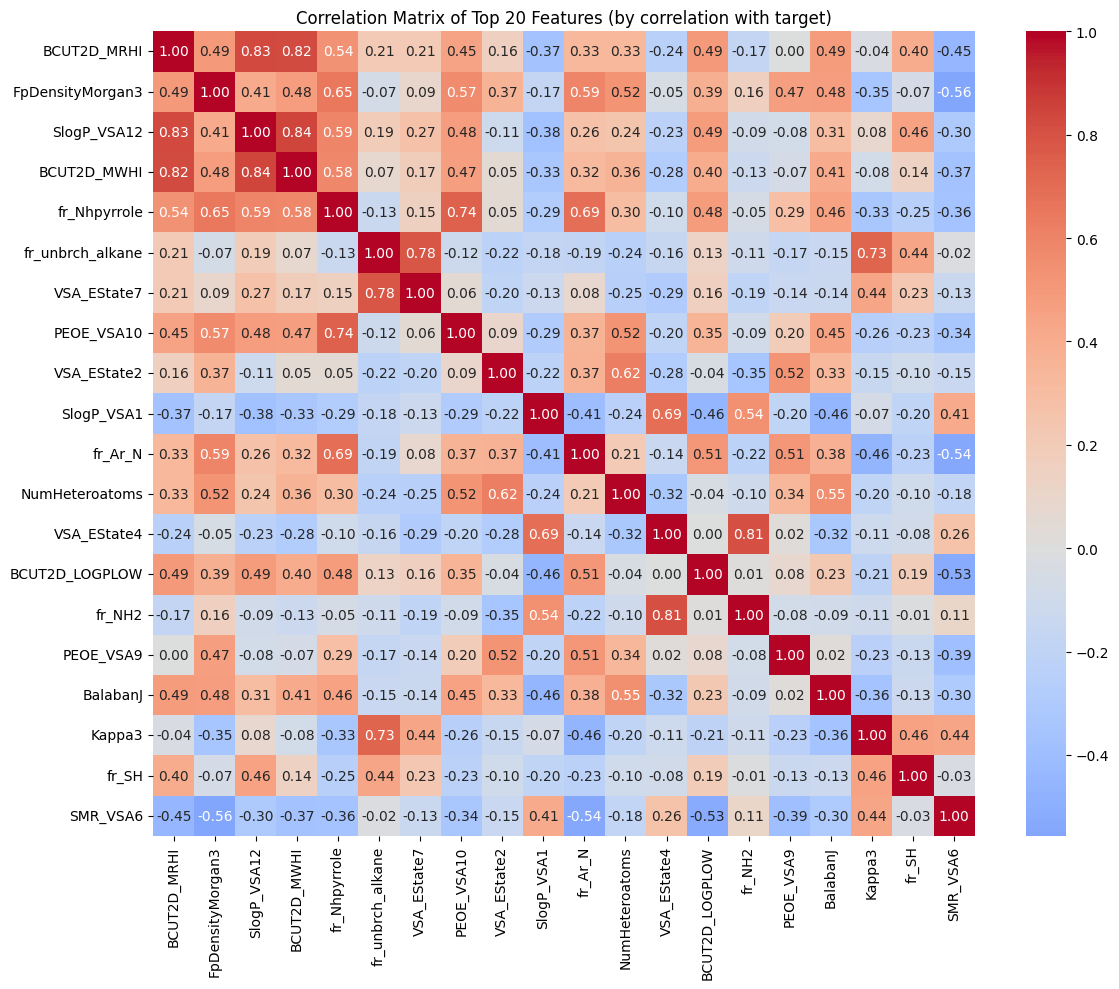

In [11]:
# Correlation-based selection: Keep best feature from each correlated group
import seaborn as sns

X_features = ml_data[feature_cols]
correlation_matrix = X_features.corr().abs()

# Calculate correlation with target for all features
target_correlations = X_features.corrwith(ml_data['max h2 (umol)']).abs()

# Find groups of correlated features
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Track which features to keep
features_to_keep = set(feature_cols)
features_to_drop_improved = set()

# For each pair of highly correlated features, keep the one more correlated with target
for i in range(len(upper_triangle.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.9:
            feat_i = upper_triangle.columns[i]
            feat_j = upper_triangle.columns[j]
            
            # Keep the feature with higher correlation to target
            if target_correlations[feat_i] >= target_correlations[feat_j]:
                if feat_j in features_to_keep:
                    features_to_drop_improved.add(feat_j)
            else:
                if feat_i in features_to_keep:
                    features_to_drop_improved.add(feat_i)

# Remove dropped features
features_to_keep = features_to_keep - features_to_drop_improved
feature_cols_reduced = sorted(list(features_to_keep))

print(f"Correlation-Based Selection:")
print(f"  Original features: {len(feature_cols)}")
print(f"  Features dropped: {len(features_to_drop_improved)}")
print(f"  Features kept: {len(feature_cols_reduced)}")

# Visualize correlation matrix of reduced features (top 20 if many features)
if len(feature_cols_reduced) > 20:
    # Show only top 20 features by correlation with target
    correlations_with_target = X_features[feature_cols_reduced].corrwith(ml_data['max h2 (umol)']).abs()
    correlations_with_target = correlations_with_target.fillna(0)
    top_features = correlations_with_target.nlargest(20).index.tolist()
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_features[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Top 20 Features (by correlation with target)')
else:
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_features[feature_cols_reduced].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Reduced Features')

plt.tight_layout()
plt.show()

In [12]:
# 2. Select top features based on correlation with target
# Calculate correlation with target
correlations_with_target = X_features[feature_cols_reduced].corrwith(ml_data['max h2 (umol)']).abs()
correlations_sorted = correlations_with_target.sort_values(ascending=False)

print("Top 10 features by correlation with target:")
print("=" * 60)
print(correlations_sorted.head(10))

# Select top 10 features
top_n_features = 10
feature_cols_selected = correlations_sorted.head(top_n_features).index.tolist()

Top 10 features by correlation with target:
BCUT2D_MRHI         0.635896
FpDensityMorgan3    0.610142
SlogP_VSA12         0.541385
BCUT2D_MWHI         0.493666
fr_Nhpyrrole        0.487822
fr_unbrch_alkane    0.487002
VSA_EState7         0.471071
PEOE_VSA10          0.439701
VSA_EState2         0.398987
SlogP_VSA1          0.393693
dtype: float64


#### Feature Descriptions - heuristic wo SFS

Brief descriptions of the top 10 selected molecular descriptors:

1. **BCUT2D_MRHI**: BCUT descriptor using molar refractivity (highest value) - measures molecular polarizability and size
2. **FpDensityMorgan3**: Morgan fingerprint density - indicates molecular complexity and structural diversity
3. **SlogP_VSA12**: SlogP-based van der Waals surface area (bin 12) - hydrophobic surface area in the highest SlogP range
4. **BCUT2D_MWHI**: BCUT descriptor using molecular weight (highest value) - measures molecular size and weight distribution
5. **fr_Nhpyrrole**: Number of N-substituted pyrrole rings - counts nitrogen-containing heterocyclic rings
6. **fr_unbrch_alkane**: Number of unbranched alkane chains - measures linear carbon chain fragments
7. **VSA_EState7**: Van der Waals surface area weighted by EState (bin 7) - electrotopological surface area in mid-range
8. **PEOE_VSA10**: Partial equalization of orbital electronegativities VSA (bin 10) - electronegativity-weighted surface area
9. **VSA_EState2**: Van der Waals surface area weighted by EState (bin 2) - electrotopological surface area in low range
10. **SlogP_VSA1**: SlogP-based van der Waals surface area (bin 1) - hydrophobic surface area in the lowest SlogP range

#### Preprocessing with Selected Features and Standardization

Round 0
Selected features: ['PEOE_VSA14' 'PEOE_VSA9' 'SMR_VSA4' 'SlogP_VSA11' 'SlogP_VSA3'
 'SlogP_VSA8' 'TPSA' 'VSA_EState3' 'Phi' 'fr_halogen']

Training models and performing Leave-One-Out Cross-Validation...

Processing Random Forest...
  Train R²: 0.428
  Test R²: 0.114
  LOO Q²: -0.094
  Test MAE: 3.04
  Test RMSE: 3.64

Processing SVR...
  Train R²: 0.532
  Test R²: -0.063
  LOO Q²: -2.340
  Test MAE: 3.17
  Test RMSE: 3.99

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: -1.077
  LOO Q²: 0.052
  Test MAE: 4.54
  Test RMSE: 5.58

Processing Bayesian Ridge...
  Train R²: 0.920
  Test R²: -1.609
  LOO Q²: -0.532
  Test MAE: 5.13
  Test RMSE: 6.25


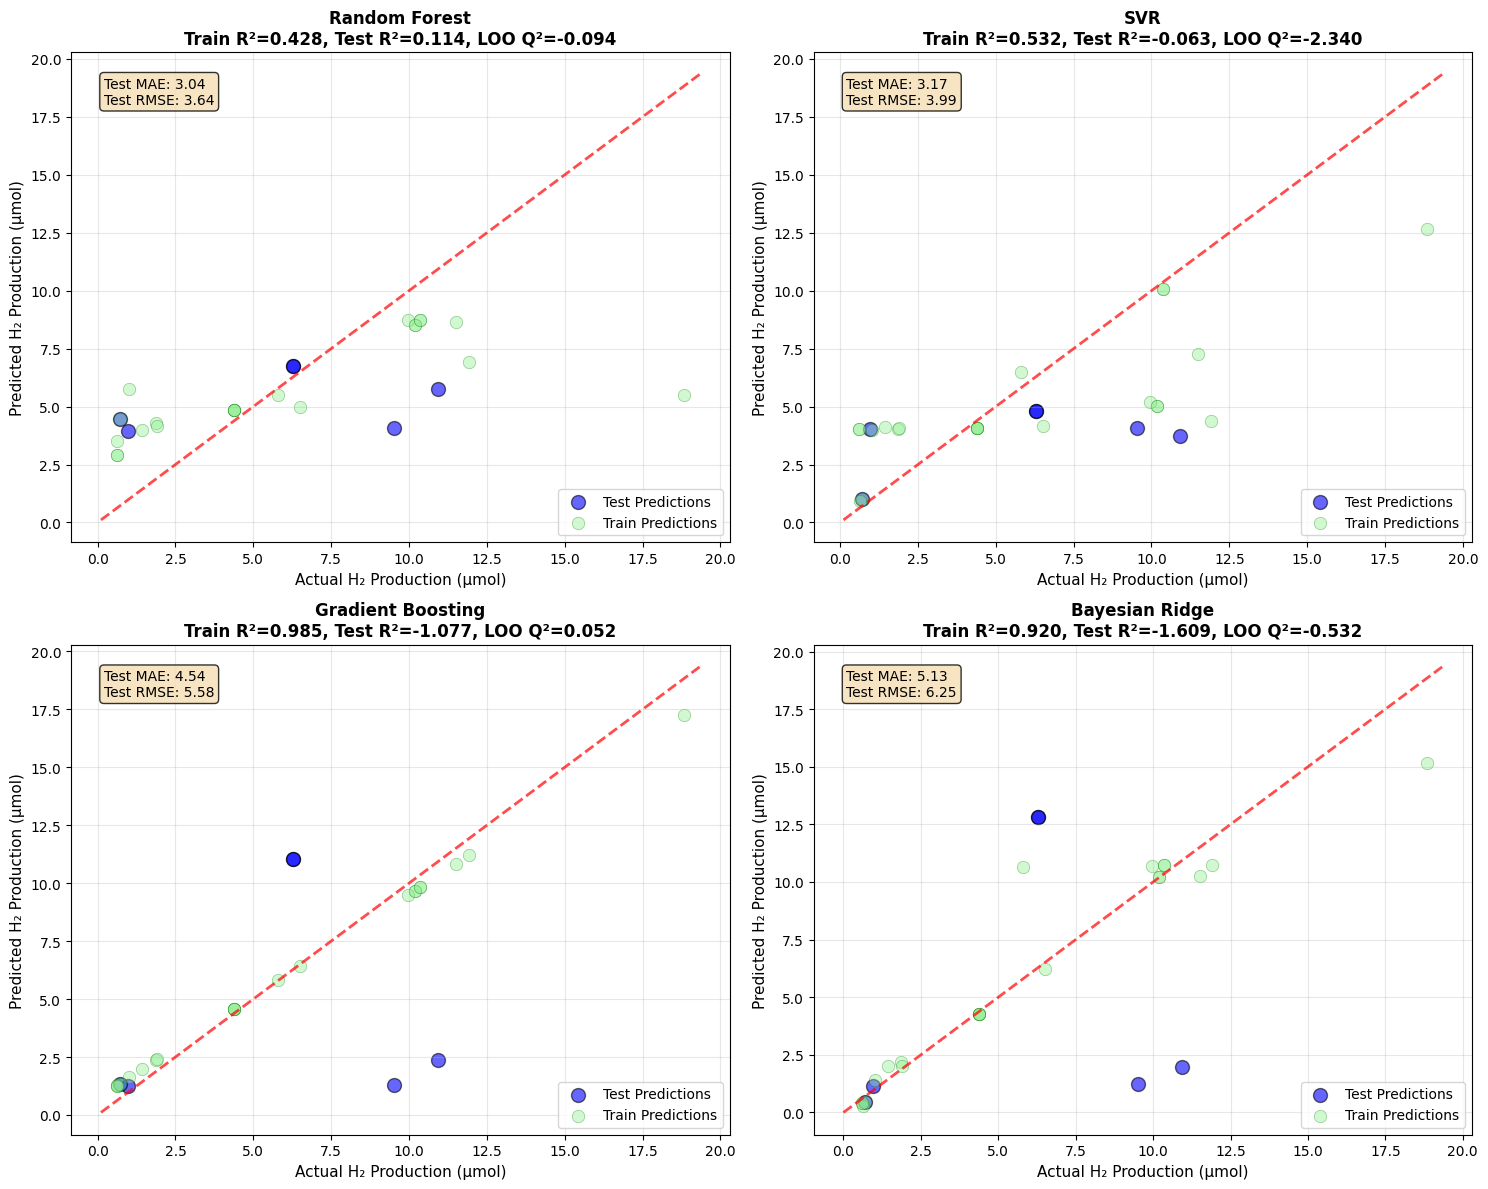


Model Performance Summary:
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.428 |    0.114 |   -0.094 |     3.04 |     3.64
SVR                  |    0.532 |   -0.063 |   -2.340 |     3.17 |     3.99
Gradient Boosting    |    0.985 |   -1.077 |    0.052 |     4.54 |     5.58
Bayesian Ridge       |    0.920 |   -1.609 |   -0.532 |     5.13 |     6.25
Round 1
Selected features: ['MinAbsEStateIndex' 'SPS' 'Kappa2' 'PEOE_VSA2' 'SMR_VSA10' 'SlogP_VSA2'
 'NumHAcceptors' 'fr_Ar_N' 'fr_aryl_methyl' 'fr_bicyclic']

Training models and performing Leave-One-Out Cross-Validation...

Processing Random Forest...
  Train R²: 0.628
  Test R²: 0.515
  LOO Q²: 0.150
  Test MAE: 2.26
  Test RMSE: 2.49

Processing SVR...
  Train R²: 0.580
  Test R²: 0.321
  LOO Q²: -0.130
  Test MAE: 2.21
  Test RMSE: 2.94

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: 0.983
  LOO Q²: 0.434
  Test MAE: 0.42
  Test RMSE: 0.46

Processing Bayesian Ridge.

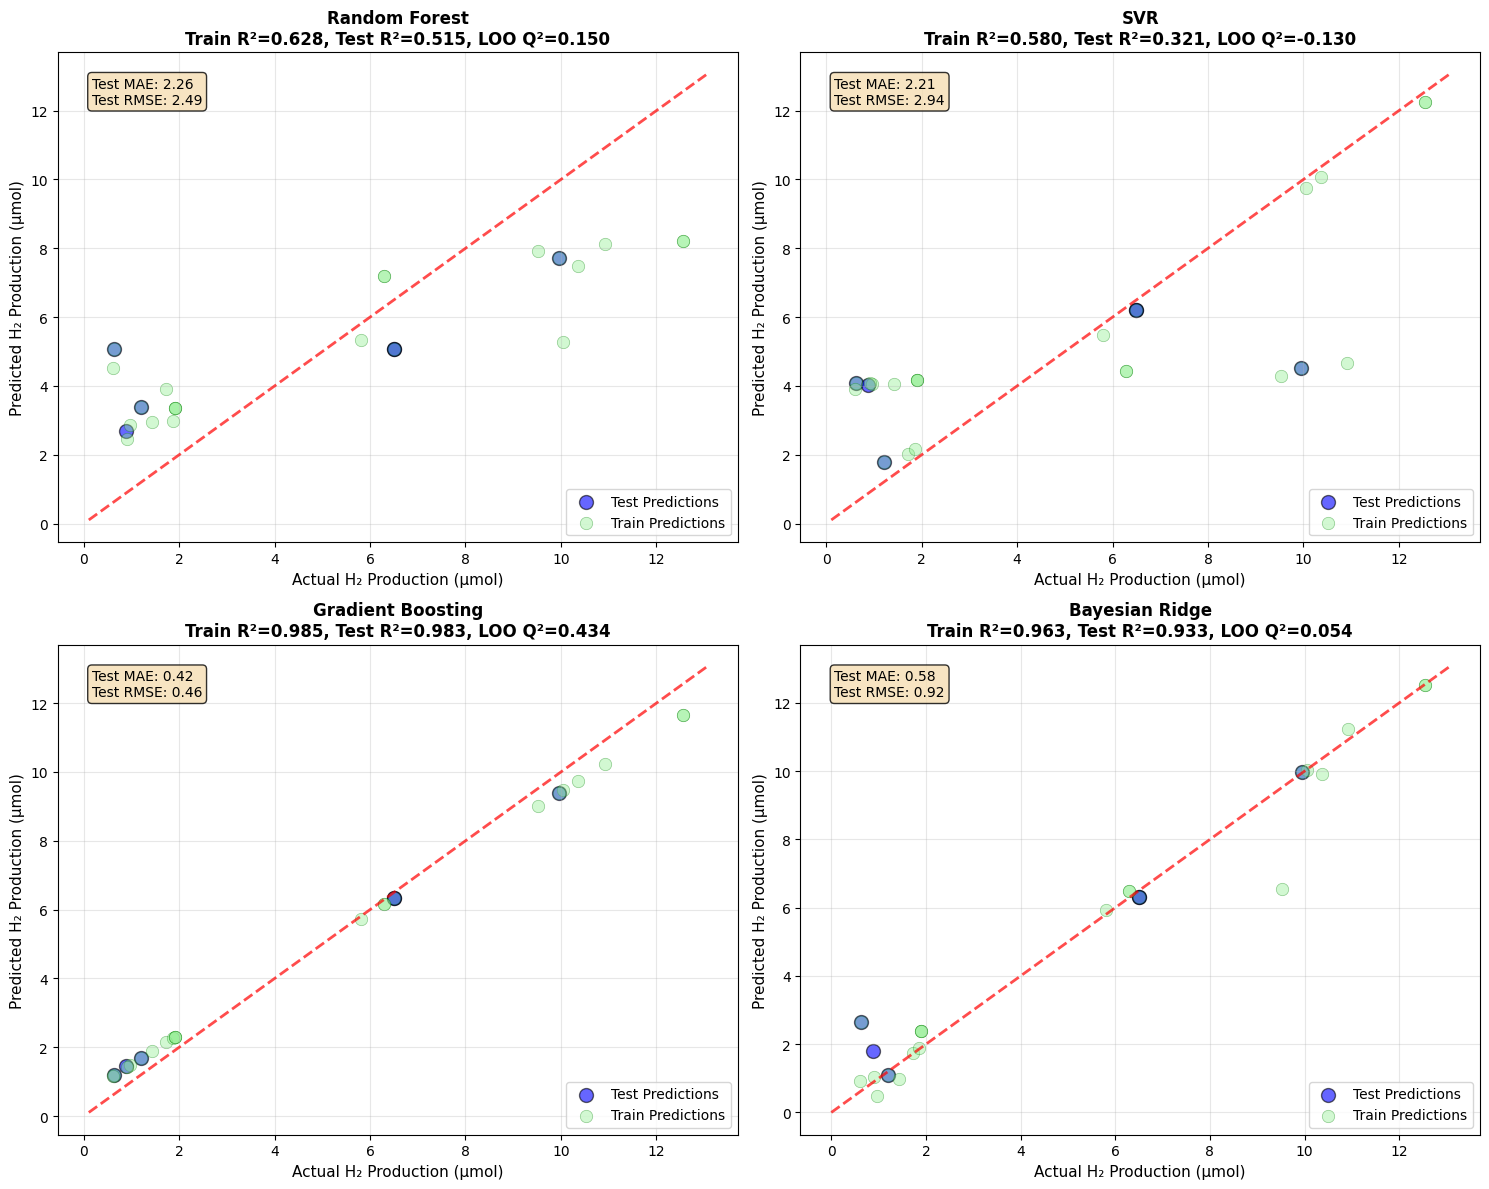


Model Performance Summary:
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.628 |    0.515 |    0.150 |     2.26 |     2.49
SVR                  |    0.580 |    0.321 |   -0.130 |     2.21 |     2.94
Gradient Boosting    |    0.985 |    0.983 |    0.434 |     0.42 |     0.46
Bayesian Ridge       |    0.963 |    0.933 |    0.054 |     0.58 |     0.92
Round 2
Selected features: ['FpDensityMorgan2' 'BCUT2D_MWHI' 'PEOE_VSA2' 'SMR_VSA1' 'SMR_VSA4'
 'EState_VSA2' 'VSA_EState4' 'RingCount' 'fr_NH2' 'fr_SH']

Training models and performing Leave-One-Out Cross-Validation...

Processing Random Forest...
  Train R²: 0.802
  Test R²: 0.572
  LOO Q²: 0.247
  Test MAE: 2.44
  Test RMSE: 2.84

Processing SVR...
  Train R²: 0.258
  Test R²: 0.264
  LOO Q²: -0.023
  Test MAE: 2.58
  Test RMSE: 3.72

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: 0.884
  LOO Q²: -0.635
  Test MAE: 1.00
  Test RMSE: 1.48

Processing Bayesian Ridge...
 

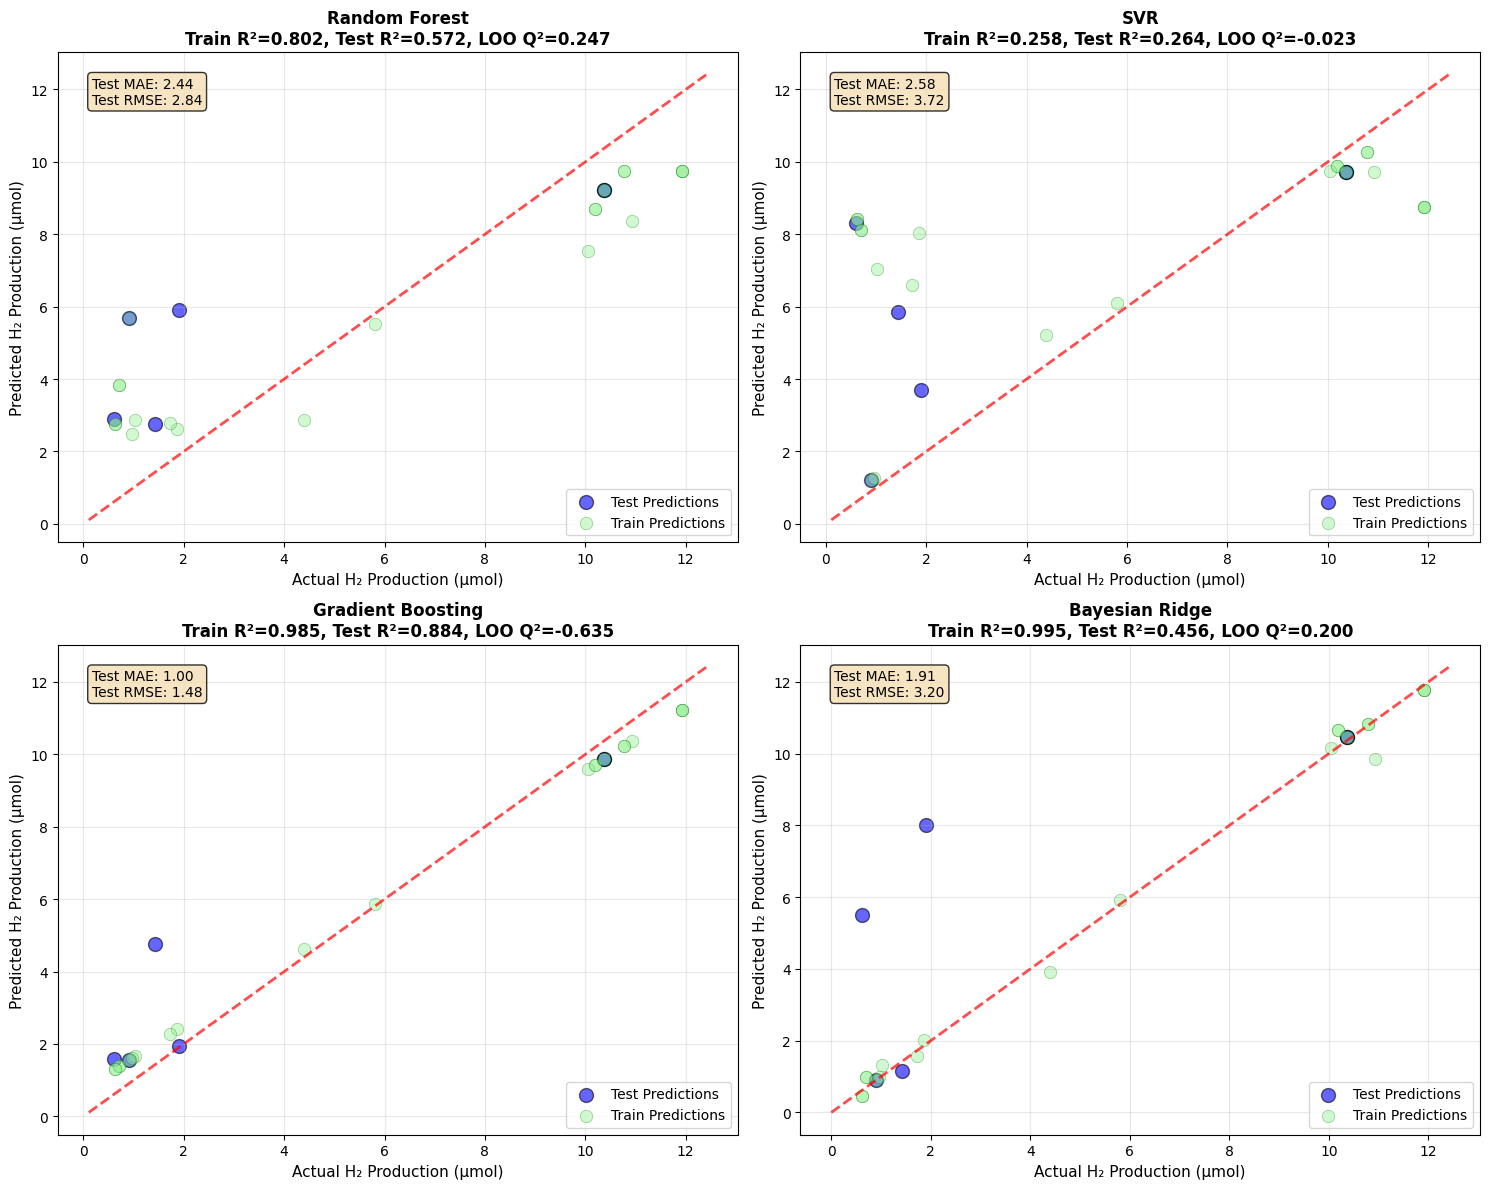


Model Performance Summary:
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.802 |    0.572 |    0.247 |     2.44 |     2.84
SVR                  |    0.258 |    0.264 |   -0.023 |     2.58 |     3.72
Gradient Boosting    |    0.985 |    0.884 |   -0.635 |     1.00 |     1.48
Bayesian Ridge       |    0.995 |    0.456 |    0.200 |     1.91 |     3.20
Round 3
Selected features: ['BalabanJ' 'PEOE_VSA10' 'PEOE_VSA4' 'PEOE_VSA5' 'SMR_VSA3' 'SlogP_VSA12'
 'SlogP_VSA8' 'EState_VSA3' 'VSA_EState2' 'NumHeteroatoms']

Training models and performing Leave-One-Out Cross-Validation...

Processing Random Forest...
  Train R²: 0.680
  Test R²: 0.695
  LOO Q²: 0.200
  Test MAE: 1.63
  Test RMSE: 1.78

Processing SVR...
  Train R²: 0.733
  Test R²: 0.206
  LOO Q²: -2.940
  Test MAE: 1.65
  Test RMSE: 2.87

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: 0.817
  LOO Q²: 0.259
  Test MAE: 0.82
  Test RMSE: 1.38

Processing Bayesian Ridg

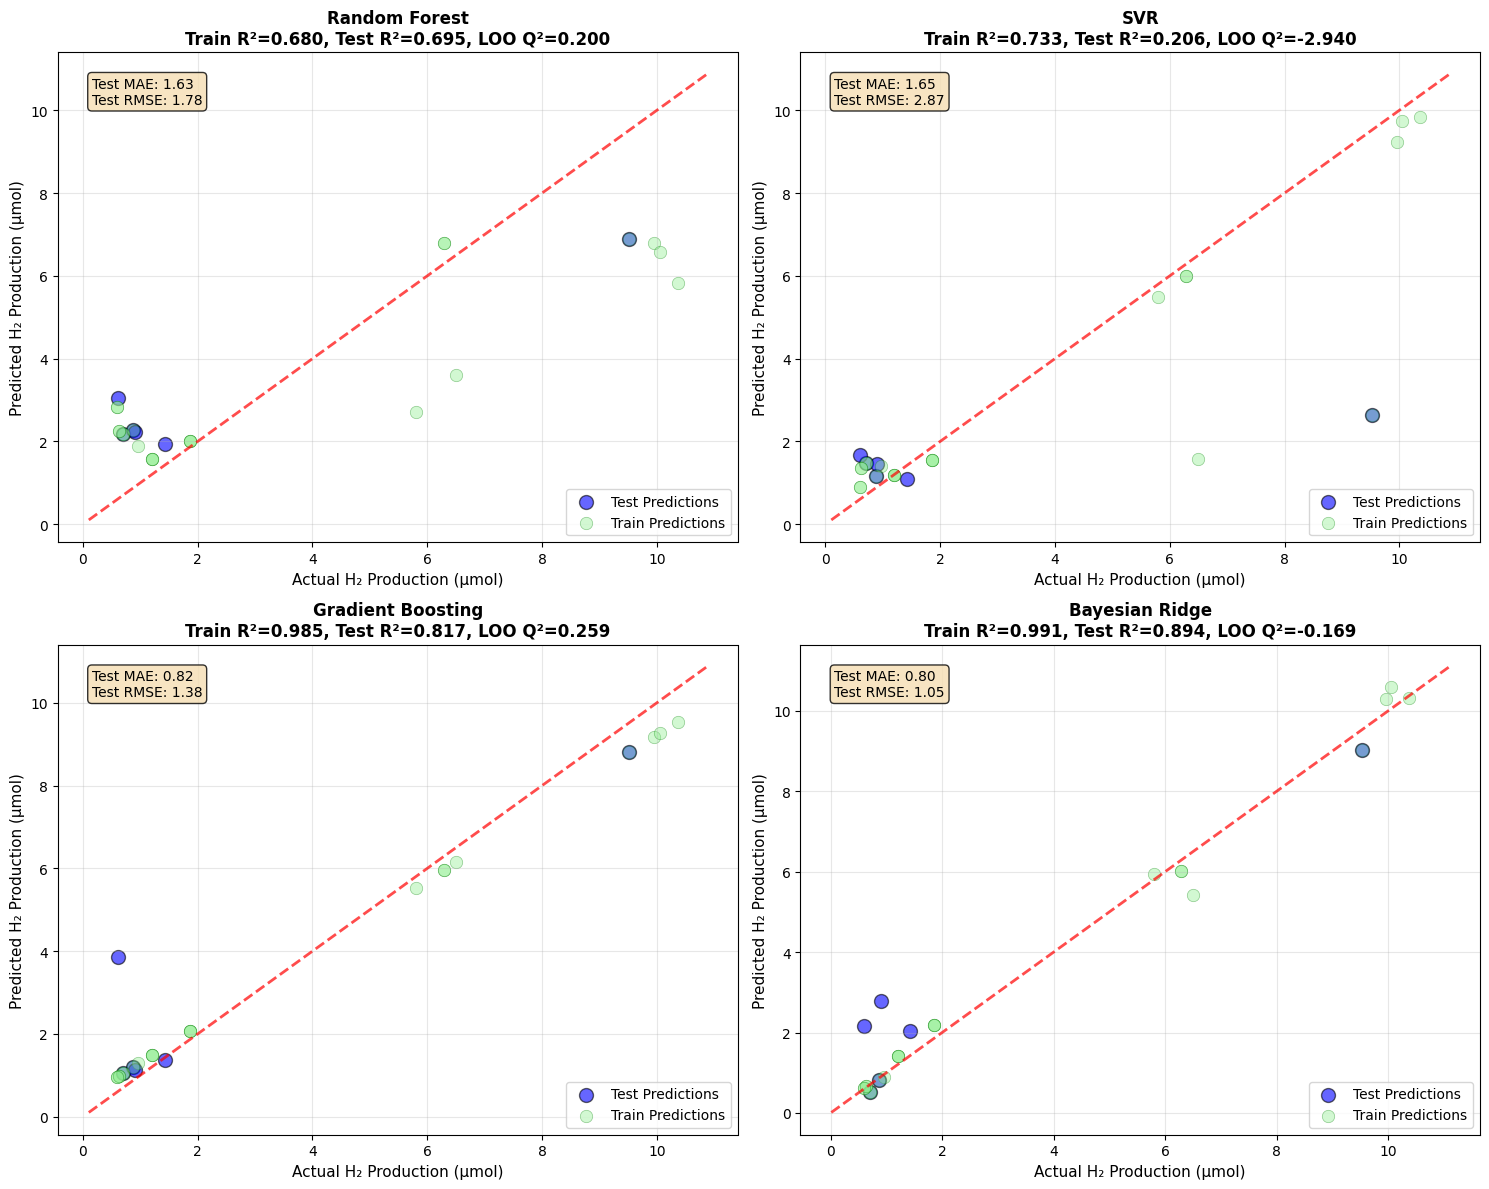


Model Performance Summary:
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.680 |    0.695 |    0.200 |     1.63 |     1.78
SVR                  |    0.733 |    0.206 |   -2.940 |     1.65 |     2.87
Gradient Boosting    |    0.985 |    0.817 |    0.259 |     0.82 |     1.38
Bayesian Ridge       |    0.991 |    0.894 |   -0.169 |     0.80 |     1.05
Round 4
Selected features: ['Ipc' 'PEOE_VSA3' 'SMR_VSA2' 'SlogP_VSA12' 'SlogP_VSA8' 'EState_VSA9'
 'VSA_EState3' 'fr_Ar_NH' 'fr_Nhpyrrole' 'fr_unbrch_alkane']

Training models and performing Leave-One-Out Cross-Validation...

Processing Random Forest...
  Train R²: 0.597
  Test R²: 0.735
  LOO Q²: 0.246
  Test MAE: 2.20
  Test RMSE: 2.37

Processing SVR...
  Train R²: 0.877
  Test R²: 0.712
  LOO Q²: -55.564
  Test MAE: 1.30
  Test RMSE: 2.47

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: 0.308
  LOO Q²: -0.144
  Test MAE: 1.97
  Test RMSE: 3.83

Processing Bayesian Ridg

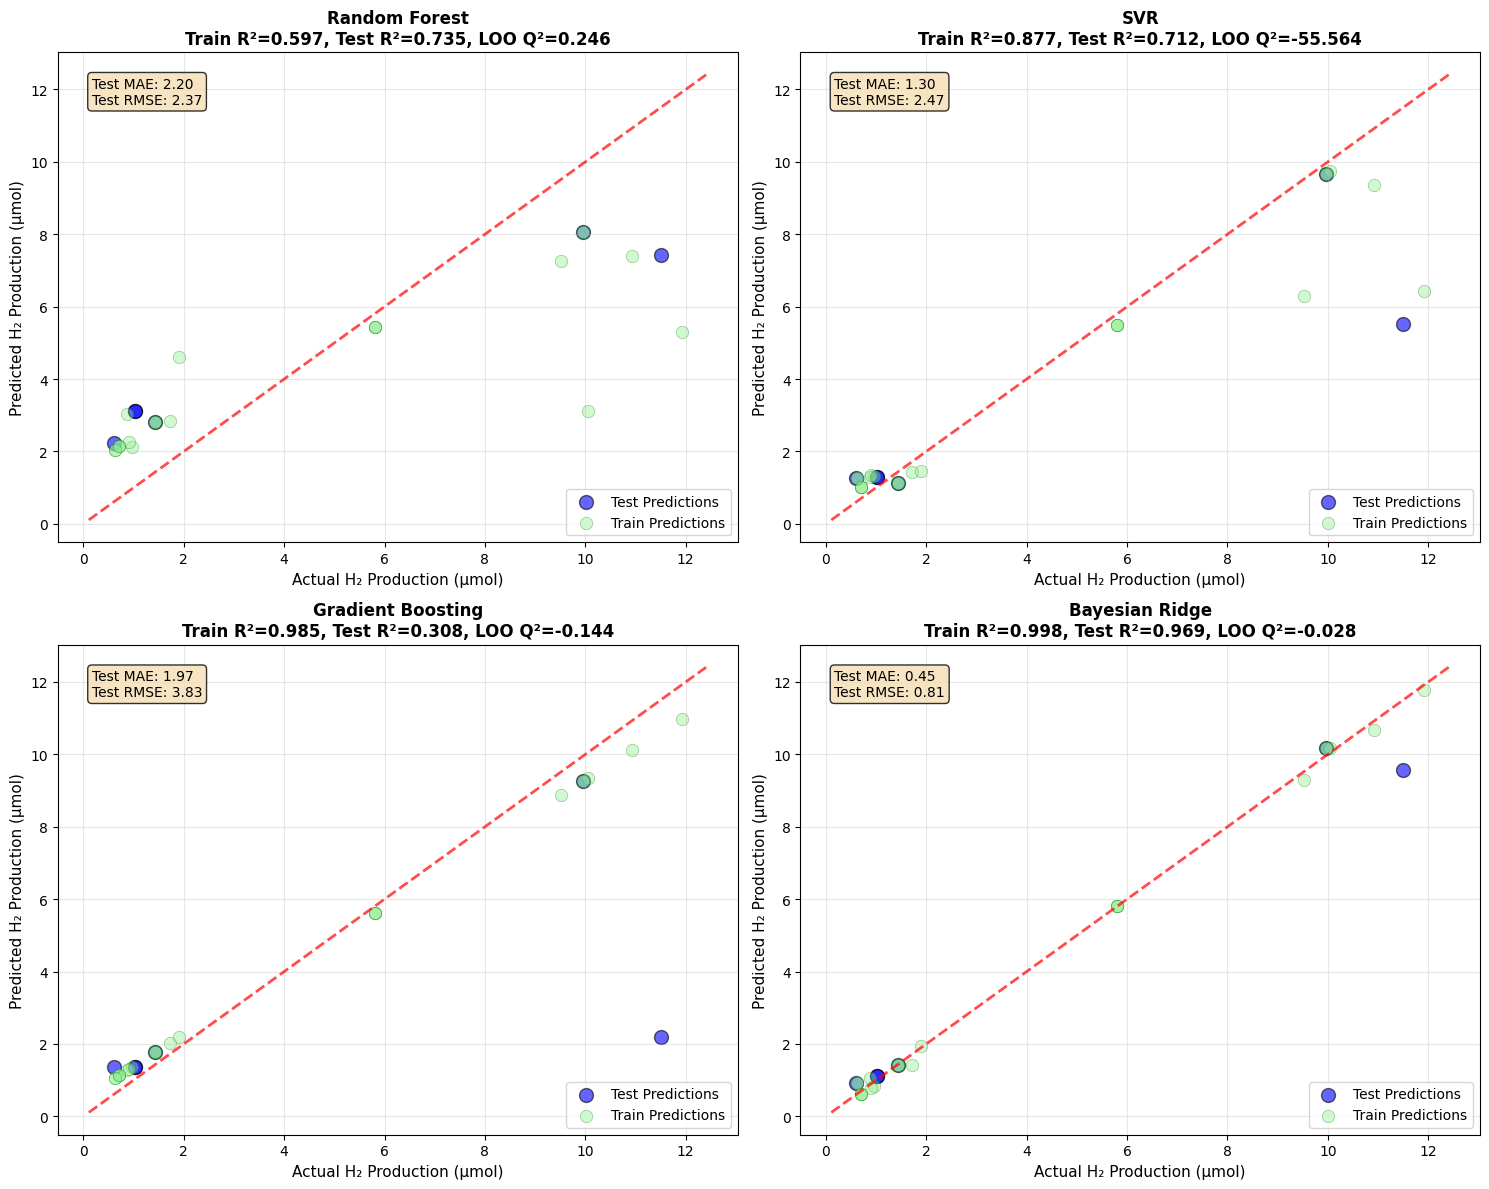


Model Performance Summary:
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.597 |    0.735 |    0.246 |     2.20 |     2.37
SVR                  |    0.877 |    0.712 |  -55.564 |     1.30 |     2.47
Gradient Boosting    |    0.985 |    0.308 |   -0.144 |     1.97 |     3.83
Bayesian Ridge       |    0.998 |    0.969 |   -0.028 |     0.45 |     0.81


In [13]:
# 3. Prepare features with selected features and train multiple models
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Use selected features
X = ml_data[feature_cols]
y = ml_data['max h2 (umol)']


# Select 10 features using Linear Regression for feature selection
est = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

chosen_descriptors = []  # Collect the 10 chosen features for every round here
for i in range(5):
    print("Round", i)
    # Take bootstrap sample
    X_, y_ = resample(X, y)

    # Split the data (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=21)

    selector = SFS(est, n_features_to_select=10, cv=5, direction="forward")
    selector.fit(X_train, y_train)
    print("Selected features:", selector.get_feature_names_out())

    # Transform data to selected features
    X_small = selector.transform(X)
    X_small_train = selector.transform(X_train)
    X_small_test = selector.transform(X_test)

    # Define models to train
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=50,
            max_depth=3, 
            min_samples_split=5,
            min_samples_leaf=3,
            max_features='sqrt',
            random_state=21
        ),
        'SVR': Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', SVR(kernel='poly', C=1.0, gamma='scale', epsilon=0.3))
        ]),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=20, max_depth=10, learning_rate=0.1, random_state=21),
        'Bayesian Ridge': Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', BayesianRidge())
        ]),
    }

    # Store results for all models
    results = {}

    print("\n" + "="*80)
    print("Training models and performing Leave-One-Out Cross-Validation...")
    print("="*80)

    for model_name, model in models.items():
        print(f"\nProcessing {model_name}...")
        
        # Train model on the smaller feature space
        model.fit(X_small_train, y_train)
        y_train_pred = model.predict(X_small_train)
        y_test_pred = model.predict(X_small_test)
        
        # Do Leave-One-Out cross validation
        y_true, y_pred = [], []
        for train_ix, test_ix in LeaveOneOut().split(X_small):
            # Create a fresh model instance for each fold
            if isinstance(model, Pipeline):
                model_ = Pipeline([
                    ('scaler', StandardScaler()),
                    ('regressor', model.named_steps['regressor'].__class__(**model.named_steps['regressor'].get_params()))
                ])
            else:
                model_ = model.__class__(**model.get_params())
            
            # split data
            X_train_, X_test_ = X_small[train_ix, :], X_small[test_ix, :]
            y_train_, y_test_ = y.iloc[train_ix], y.iloc[test_ix]
            # fit model
            model_.fit(X_train_, y_train_)
            # evaluate model
            yhat = model_.predict(X_test_)
            # store
            y_true.append(y_test_.iloc[0])
            y_pred.append(yhat[0])
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        loo_q2 = r2_score(y_true, y_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        # Store results
        results[model_name] = {
            'model': model,
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred,
            'y_loo_true': y_true,
            'y_loo_pred': y_pred,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'loo_q2': loo_q2,
            'test_mae': test_mae,
            'test_rmse': test_rmse
        }
        
        print(f"  Train R²: {train_r2:.3f}")
        print(f"  Test R²: {test_r2:.3f}")
        print(f"  LOO Q²: {loo_q2:.3f}")
        print(f"  Test MAE: {test_mae:.2f}")
        print(f"  Test RMSE: {test_rmse:.2f}")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for idx, (model_name, result) in enumerate(results.items()):
        y_train_pred = result['y_train_pred']
        y_test_pred = result['y_test_pred']
        train_r2 = result['train_r2']
        test_r2 = result['test_r2']
        loo_q2 = result['loo_q2']
        test_mae = result['test_mae']
        test_rmse = result['test_rmse']
        
        # Actual vs Predicted
        axes[idx].scatter(y_test, y_test_pred, color='blue', alpha=0.6, s=100, 
                        label='Test Predictions', edgecolors='black', linewidth=1)
        axes[idx].scatter(y_train, y_train_pred, color='lightgreen', alpha=0.4, s=80,
                        label='Train Predictions', edgecolors='green', linewidth=0.5)
        
        axes[idx].set_xlabel('Actual H₂ Production (μmol)', fontsize=11)
        axes[idx].set_ylabel('Predicted H₂ Production (μmol)', fontsize=11)
        axes[idx].set_title(f'{model_name}\nTrain R²={train_r2:.3f}, Test R²={test_r2:.3f}, LOO Q²={loo_q2:.3f}', 
                            fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend(loc='lower right')

        # Perfect prediction line
        all_vals = np.concatenate([y_train, y_test, y_train_pred, y_test_pred])
        min_val = max(0, all_vals.min() - 0.5)
        max_val = all_vals.max() + 0.5
        axes[idx].plot([min_val, max_val], [min_val, max_val], 
                    'r--', alpha=0.7, linewidth=2, label='Perfect Prediction')
        
        # Add metrics
        axes[idx].text(0.05, 0.95, f'Test MAE: {test_mae:.2f}\nTest RMSE: {test_rmse:.2f}', 
                    transform=axes[idx].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    fontsize=10)

    plt.tight_layout()
    plt.show()

    # Print summary comparison
    print("\n" + "="*80)
    print("Model Performance Summary:")
    print("="*80)
    print(f"{'Model':<20} | {'Train R²':>8} | {'Test R²':>8} | {'LOO Q²':>8} | {'MAE':>8} | {'RMSE':>8}")
    print("="*80)
    for model_name, result in results.items():
        print(f"{model_name:<20} | {result['train_r2']:8.3f} | {result['test_r2']:8.3f} | {result['loo_q2']:8.3f} | {result['test_mae']:8.2f} | {result['test_rmse']:8.2f}")

    chosen_descriptors.append(selector.get_feature_names_out())

#### Feature Descriptions - SFS

Brief descriptions of the top 10 selected molecular descriptors via Sequential Feature Selection (SFS):

1. **BCUT2D_MRHI**: BCUT descriptor using molar refractivity (highest value) - measures molecular polarizability and size
2. **Ipc**: Information content of the coefficients of the characteristic polynomial of the adjacency matrix - quantifies molecular complexity and branching
3. **PEOE_VSA12**: Partial equalization of orbital electronegativities VSA (bin 12) - electronegativity-weighted surface area in the highest range
4. **PEOE_VSA7**: Partial equalization of orbital electronegativities VSA (bin 7) - electronegativity-weighted surface area in mid-range
5. **PEOE_VSA9**: Partial equalization of orbital electronegativities VSA (bin 9) - electronegativity-weighted surface area in upper mid-range
6. **SMR_VSA10**: SMR (molar refractivity) based van der Waals surface area (bin 10) - polarizability-weighted surface area in the highest range
7. **SlogP_VSA7**: SlogP-based van der Waals surface area (bin 7) - hydrophobic surface area in mid-range
8. **fr_aryl_methyl**: Number of aryl methyl groups - counts benzene rings attached to methyl substituents
9. **fr_nitrile**: Number of nitrile groups (-C≡N) - counts cyano functional groups
10. **fr_piperdine**: Number of piperidine rings - counts saturated six-membered nitrogen-containing heterocycles (note: likely a variant of piperidine)

Processing Random Forest...
Processing SVR...
Processing Gradient Boosting...
Processing Bayesian Ridge...

Feature importances calculated for 4 models (SFS Approach):
['Random Forest', 'SVR', 'Gradient Boosting', 'Bayesian Ridge']
Using 10 SFS-selected features


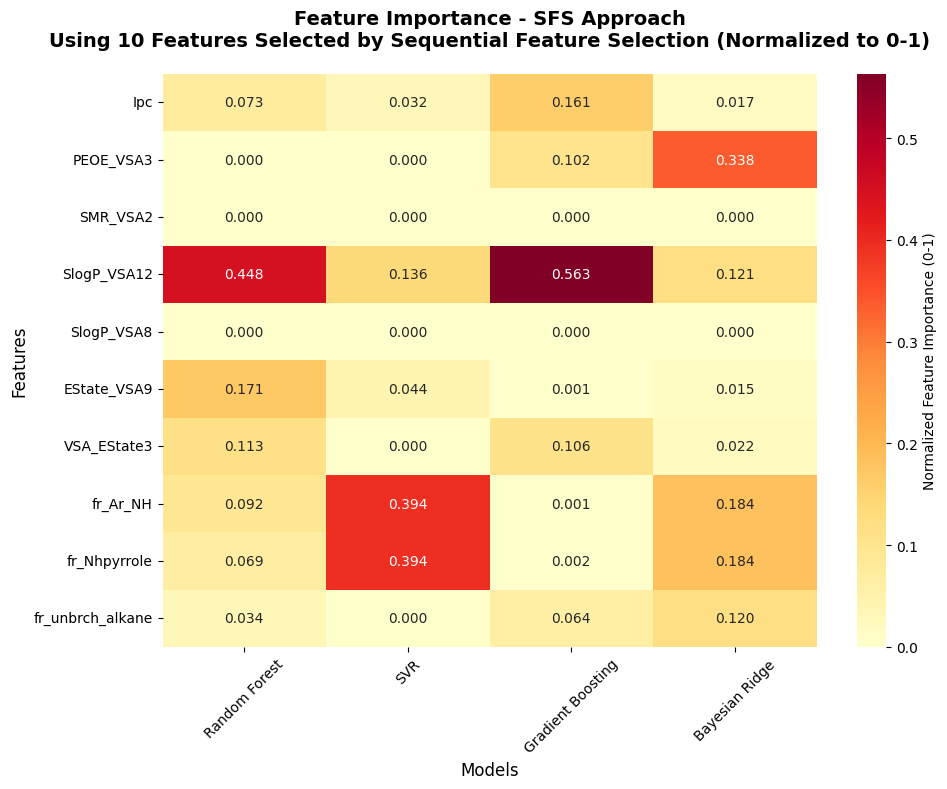


Top 5 Most Important Features by Model (SFS Approach):

Random Forest:
    feature  importance
SlogP_VSA12    0.447736
EState_VSA9    0.171360
VSA_EState3    0.112713
   fr_Ar_NH    0.091776
        Ipc    0.073187

SVR:
     feature  importance
    fr_Ar_NH    0.552271
fr_Nhpyrrole    0.552271
 SlogP_VSA12    0.190499
 EState_VSA9    0.061729
         Ipc    0.044532

Gradient Boosting:
         feature  importance
     SlogP_VSA12    0.563360
             Ipc    0.161151
     VSA_EState3    0.105976
       PEOE_VSA3    0.102468
fr_unbrch_alkane    0.064249

Bayesian Ridge:
         feature  importance
       PEOE_VSA3    2.642689
        fr_Ar_NH    1.443058
    fr_Nhpyrrole    1.443058
     SlogP_VSA12    0.944062
fr_unbrch_alkane    0.935421


In [14]:
# 5. Feature importance analysis for models from cell 20 (with SFS)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Get feature importance for each model from the results dictionary
feature_importances = {}
selected_features = selector.get_feature_names_out()

for name, result in results.items():
    model = result['model']
    print(f"Processing {name}...")
    
    # Handle pipeline models (SVR, Bayesian Ridge, etc.)
    if isinstance(model, Pipeline):
        regressor = model.named_steps['regressor']
        if hasattr(regressor, 'coef_'):
            # Linear models with coefficients
            importances = np.abs(regressor.coef_)
            feature_importances[name] = pd.DataFrame({
                'feature': selected_features,
                'importance': importances
            }).sort_values('importance', ascending=False)
        else:
            # For non-linear models in pipeline (like SVR with poly kernel)
            # Use permutation importance
            perm_importance = permutation_importance(model, X_small_test, y_test, 
                                                   n_repeats=10, random_state=21, 
                                                   scoring='r2')
            importances = perm_importance.importances_mean
            feature_importances[name] = pd.DataFrame({
                'feature': selected_features,
                'importance': importances
            }).sort_values('importance', ascending=False)
    # Handle regular models (Random Forest, Gradient Boosting)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importances[name] = pd.DataFrame({
            'feature': selected_features,
            'importance': importances
        }).sort_values('importance', ascending=False)
    else:
        # Fallback to permutation importance for any other model type
        perm_importance = permutation_importance(model, X_small_test, y_test, 
                                               n_repeats=10, random_state=21, 
                                               scoring='r2')
        importances = perm_importance.importances_mean
        feature_importances[name] = pd.DataFrame({
            'feature': selected_features,
            'importance': importances
        }).sort_values('importance', ascending=False)

print(f"\nFeature importances calculated for {len(feature_importances)} models (SFS Approach):")
print(list(feature_importances.keys()))
print(f"Using {len(selected_features)} SFS-selected features")

# Create normalized feature importance matrix for heatmap
all_features = list(selected_features)
importance_matrix = pd.DataFrame(index=all_features)

for model_name, importance_df in feature_importances.items():
    # Normalize importances to 0-1 scale for each model
    importances = importance_df.set_index('feature')['importance']
    # Handle negative values from permutation importance
    importances = np.maximum(importances, 0)
    if importances.sum() > 0:
        normalized_importances = importances / importances.sum()
    else:
        normalized_importances = importances * 0
    importance_matrix[model_name] = normalized_importances.reindex(all_features, fill_value=0)

# Create heatmap with dynamic figure size based on number of models
n_models = len(feature_importances)
fig_width = max(10, 2.5 * n_models)
fig, ax = plt.subplots(figsize=(fig_width, 8))

sns.heatmap(importance_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Feature Importance (0-1)'},
            ax=ax)

ax.set_title('Feature Importance - SFS Approach\nUsing 10 Features Selected by Sequential Feature Selection (Normalized to 0-1)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Features', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print top 5 features for each model
print("\nTop 5 Most Important Features by Model (SFS Approach):")
print("=" * 80)
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name}:")
    print(importance_df.head(5).to_string(index=False))

#### Alternative: Build models without SFS
Below is an alternative approach that trains models on the same top 10 features selected by correlation (from cell 17), but WITHOUT using Sequential Feature Selection. This allows comparison between SFS and simple correlation-based feature selection.

In [15]:
# Alternative: Build and evaluate models without feature selection (using all reduced features)
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Use top 10 correlation-selected features (not SFS-selected)
X_alt = ml_data[feature_cols_selected]
y_alt = ml_data['max h2 (umol)']

# Split the data (80:20)
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y_alt, test_size=0.2, random_state=21)
print(f"Using {len(feature_cols_selected)} correlation-selected features (no SFS)")
print("Top 10 features selected by correlation:", feature_cols_selected)

# Use models appropriate for smaller datasets
models_alt = {
    'Random Forest': RandomForestRegressor(
        n_estimators=50,
        max_depth=3, 
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=21
    ),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR(kernel='poly', C=1.0, gamma='scale', epsilon=0.3))
    ]),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=20, max_depth=10, learning_rate=0.1, random_state=21),
    'Bayesian Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', BayesianRidge())
    ]),
}

results_alt = {}

print("="*80)
print("Alternative Approach: Training models without SFS")
print("="*80)

for name, model in models_alt.items():
    print(f"\nProcessing {name}...")
    
    # Fit model on training data (already scaled via pipeline or raw for RF)
    model.fit(X_train_alt, y_train_alt)
    
    # Predictions
    y_pred_train = model.predict(X_train_alt)
    y_pred_test = model.predict(X_test_alt)
    
    # Do Leave-One-Out cross validation on the full dataset
    y_true, y_pred = [], []
    for train_ix, test_ix in LeaveOneOut().split(X_alt):
        # Create a fresh model instance for each fold
        if isinstance(model, Pipeline):
            model_ = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', model.named_steps['regressor'].__class__(**model.named_steps['regressor'].get_params()))
            ])
        else:
            model_ = model.__class__(**model.get_params())
        
        # split data
        X_train_, X_test_ = X_alt.iloc[train_ix, :], X_alt.iloc[test_ix, :]
        y_train_, y_test_ = y_alt.iloc[train_ix], y_alt.iloc[test_ix]
        # fit model
        model_.fit(X_train_, y_train_)
        # evaluate model
        yhat = model_.predict(X_test_)
        # store
        y_true.append(y_test_.iloc[0])
        y_pred.append(yhat[0])
    
    # Cross-validation on training set (5-fold)
    cv_scores = cross_val_score(model, X_train_alt, y_train_alt, cv=5, scoring='r2')
    
    # Calculate metrics
    train_r2 = r2_score(y_train_alt, y_pred_train)
    test_r2 = r2_score(y_test_alt, y_pred_test)
    loo_q2 = r2_score(y_true, y_pred)
    test_mae = mean_absolute_error(y_test_alt, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_alt, y_pred_test))
    
    # Store results
    results_alt[name] = {
        'model': model,
        'y_train_pred': y_pred_train,
        'y_test_pred': y_pred_test,
        'y_loo_true': y_true,
        'y_loo_pred': y_pred,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'loo_q2': loo_q2,
        'test_mae': test_mae,
        'test_rmse': test_rmse
    }
    
    print(f"  Train R²: {train_r2:.3f}")
    print(f"  Test R²: {test_r2:.3f}")
    print(f"  5-Fold CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"  LOO Q²: {loo_q2:.3f}")
    print(f"  Test MAE: {test_mae:.2f}")
    print(f"  Test RMSE: {test_rmse:.2f}")

# Display results
results_data = {
    name: {
        'Train R²': result['train_r2'],
        'Test R²': result['test_r2'],
        'CV R² Mean': result['cv_r2_mean'],
        'CV R² Std': result['cv_r2_std'],
        'LOO Q²': result['loo_q2'],
        'MAE': result['test_mae'],
        'RMSE': result['test_rmse']
    }
    for name, result in results_alt.items()
}
results_df_alt = pd.DataFrame(results_data).T
print("\n" + "="*80)
print("Model Performance Comparison (Without Feature Selection):")
print("="*80)
print(results_df_alt.round(3))

Using 10 correlation-selected features (no SFS)
Top 10 features selected by correlation: ['BCUT2D_MRHI', 'FpDensityMorgan3', 'SlogP_VSA12', 'BCUT2D_MWHI', 'fr_Nhpyrrole', 'fr_unbrch_alkane', 'VSA_EState7', 'PEOE_VSA10', 'VSA_EState2', 'SlogP_VSA1']
Alternative Approach: Training models without SFS

Processing Random Forest...
  Train R²: 0.598
  Test R²: 0.781
  5-Fold CV R²: -3.900 ± 7.665
  LOO Q²: 0.279
  Test MAE: 1.96
  Test RMSE: 2.22

Processing SVR...
  Train R²: 0.474
  Test R²: 0.538
  5-Fold CV R²: -10.261 ± 20.194
  LOO Q²: -58.329
  Test MAE: 2.34
  Test RMSE: 3.23

Processing Gradient Boosting...
  Train R²: 0.985
  Test R²: 0.672
  5-Fold CV R²: -4.768 ± 8.199
  LOO Q²: 0.223
  Test MAE: 1.69
  Test RMSE: 2.72

Processing Bayesian Ridge...
  Train R²: 0.851
  Test R²: 0.741
  5-Fold CV R²: -1.938 ± 3.315
  LOO Q²: 0.604
  Test MAE: 1.94
  Test RMSE: 2.41

Model Performance Comparison (Without Feature Selection):
                   Train R²  Test R²  CV R² Mean  CV R² Std

#### Feature importance heatmap for alternative approach
This analyzes feature importance for models trained WITHOUT Sequential Feature Selection (using the top 10 correlation-selected features from cell 17).

Processing Random Forest...
Processing SVR...
Processing Gradient Boosting...
Processing Bayesian Ridge...

Feature importances calculated for 4 models (Alternative Approach):
['Random Forest', 'SVR', 'Gradient Boosting', 'Bayesian Ridge']
Using 10 correlation-selected features (no SFS)


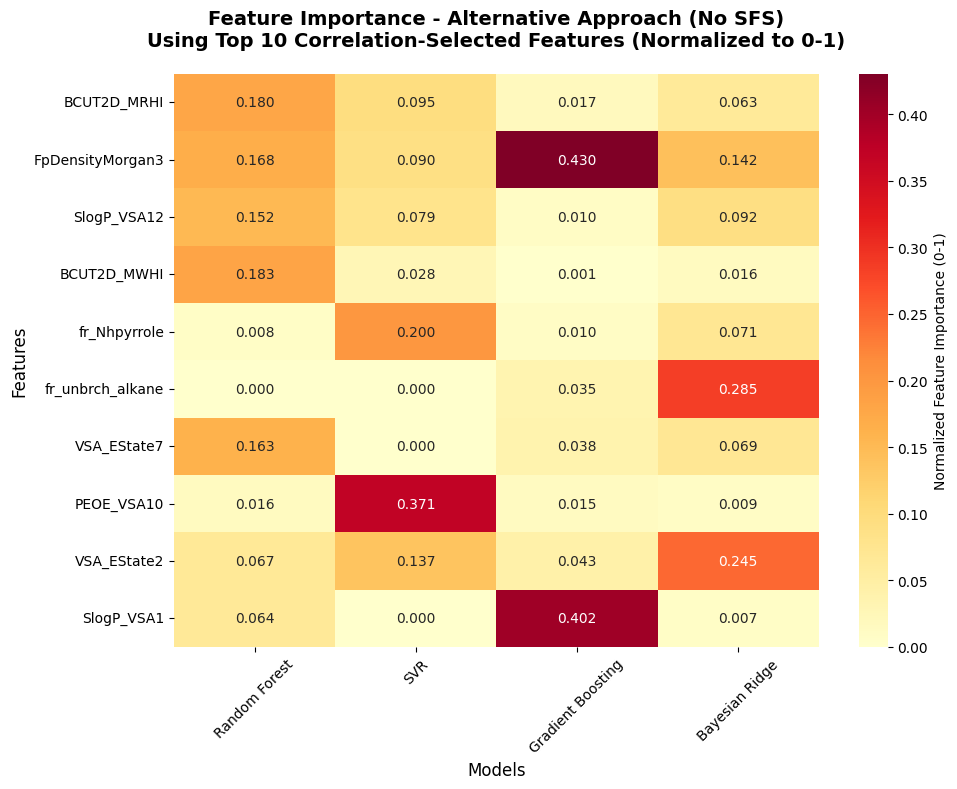


Top 10 Most Important Features by Model (Alternative Approach - No SFS):

Random Forest:
         feature  importance
     BCUT2D_MWHI    0.183024
     BCUT2D_MRHI    0.179545
FpDensityMorgan3    0.167671
     VSA_EState7    0.162849
     SlogP_VSA12    0.152236
     VSA_EState2    0.066510
      SlogP_VSA1    0.064416
      PEOE_VSA10    0.016158
    fr_Nhpyrrole    0.007591
fr_unbrch_alkane    0.000000

SVR:
         feature  importance
      PEOE_VSA10    0.440796
    fr_Nhpyrrole    0.238326
     VSA_EState2    0.162291
     BCUT2D_MRHI    0.113339
FpDensityMorgan3    0.106851
     SlogP_VSA12    0.094017
     BCUT2D_MWHI    0.033236
fr_unbrch_alkane    0.000000
     VSA_EState7   -0.004568
      SlogP_VSA1   -0.046537

Gradient Boosting:
         feature  importance
FpDensityMorgan3    0.430335
      SlogP_VSA1    0.401879
     VSA_EState2    0.042718
     VSA_EState7    0.037638
fr_unbrch_alkane    0.034631
     BCUT2D_MRHI    0.017331
      PEOE_VSA10    0.014796
    fr_Nhpyrro

In [16]:
# 5. Feature importance analysis for alternative approach (without SFS)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Get feature importance for each model from the results_alt dictionary
feature_importances_alt = {}
alternative_features = feature_cols_selected  # Use top 10 correlation-selected features

for name, result in results_alt.items():
    model = result['model']
    print(f"Processing {name}...")
    
    # Handle pipeline models (SVR, Bayesian Ridge, etc.)
    if isinstance(model, Pipeline):
        regressor = model.named_steps['regressor']
        if hasattr(regressor, 'coef_'):
            # Linear models with coefficients
            importances = np.abs(regressor.coef_)
            feature_importances_alt[name] = pd.DataFrame({
                'feature': alternative_features,
                'importance': importances
            }).sort_values('importance', ascending=False)
        else:
            # For non-linear models in pipeline (like SVR with poly kernel)
            # Use permutation importance
            perm_importance = permutation_importance(model, X_test_alt, y_test_alt, 
                                                   n_repeats=10, random_state=21, 
                                                   scoring='r2')
            importances = perm_importance.importances_mean
            feature_importances_alt[name] = pd.DataFrame({
                'feature': alternative_features,
                'importance': importances
            }).sort_values('importance', ascending=False)
    # Handle regular models (Random Forest, Gradient Boosting)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importances_alt[name] = pd.DataFrame({
            'feature': alternative_features,
            'importance': importances
        }).sort_values('importance', ascending=False)
    else:
        # Fallback to permutation importance for any other model type
        perm_importance = permutation_importance(model, X_test_alt, y_test_alt, 
                                               n_repeats=10, random_state=21, 
                                               scoring='r2')
        importances = perm_importance.importances_mean
        feature_importances_alt[name] = pd.DataFrame({
            'feature': alternative_features,
            'importance': importances
        }).sort_values('importance', ascending=False)

print(f"\nFeature importances calculated for {len(feature_importances_alt)} models (Alternative Approach):")
print(list(feature_importances_alt.keys()))
print(f"Using {len(alternative_features)} correlation-selected features (no SFS)")

# Create normalized feature importance matrix for heatmap
all_features_alt = list(alternative_features)
importance_matrix_alt = pd.DataFrame(index=all_features_alt)

for model_name, importance_df in feature_importances_alt.items():
    # Normalize importances to 0-1 scale for each model
    importances = importance_df.set_index('feature')['importance']
    # Handle negative values from permutation importance
    importances = np.maximum(importances, 0)
    if importances.sum() > 0:
        normalized_importances = importances / importances.sum()
    else:
        normalized_importances = importances * 0
    importance_matrix_alt[model_name] = normalized_importances.reindex(all_features_alt, fill_value=0)

# Create heatmap with dynamic figure size based on number of models
n_models_alt = len(feature_importances_alt)
fig_width_alt = max(10, 2.5 * n_models_alt)
fig, ax = plt.subplots(figsize=(fig_width_alt, 8))

sns.heatmap(importance_matrix_alt, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Feature Importance (0-1)'},
            ax=ax)

ax.set_title('Feature Importance - Alternative Approach (No SFS)\nUsing Top 10 Correlation-Selected Features (Normalized to 0-1)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Features', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print top 10 features for each model
print("\nTop 10 Most Important Features by Model (Alternative Approach - No SFS):")
print("=" * 80)
for model_name, importance_df in feature_importances_alt.items():
    print(f"\n{model_name}:")
    print(importance_df.head(10).to_string(index=False))

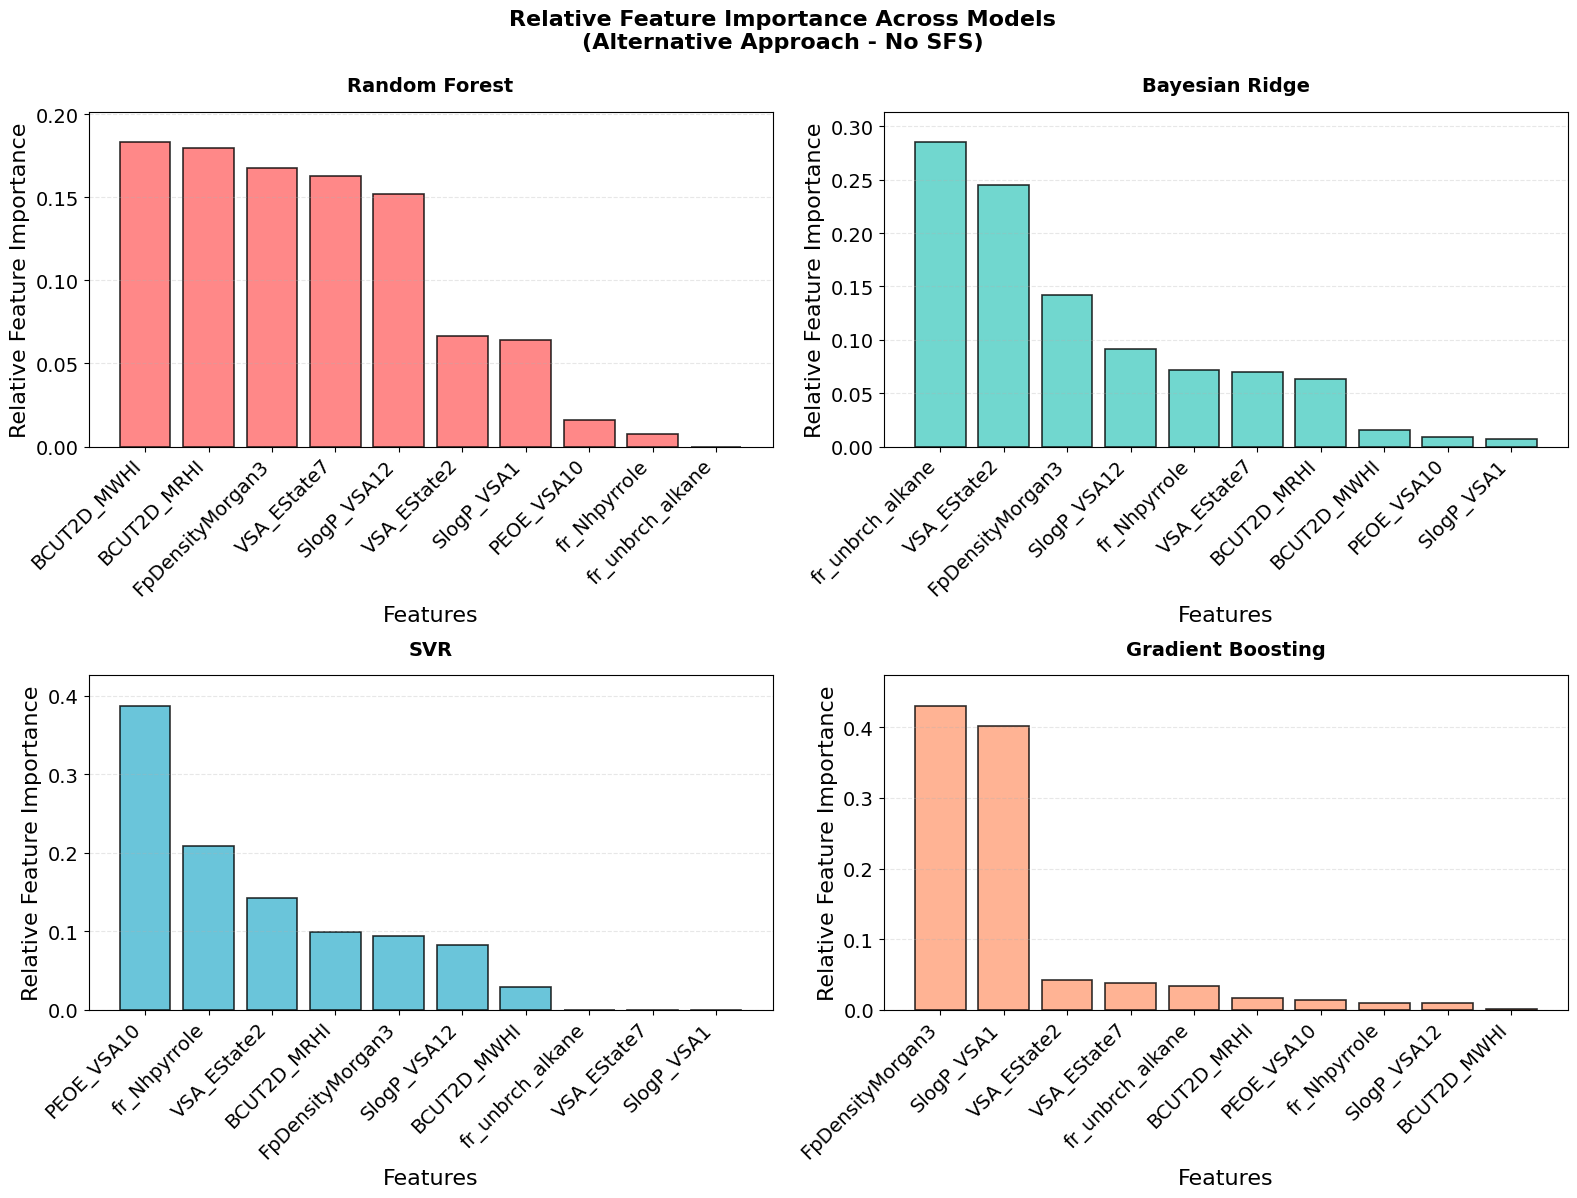


Feature Importance Rankings (Alternative Approach - No SFS):

Random Forest:
         feature  importance
     BCUT2D_MWHI    0.183024
     BCUT2D_MRHI    0.179545
FpDensityMorgan3    0.167671
     VSA_EState7    0.162849
     SlogP_VSA12    0.152236
     VSA_EState2    0.066510
      SlogP_VSA1    0.064416
      PEOE_VSA10    0.016158
    fr_Nhpyrrole    0.007591
fr_unbrch_alkane    0.000000

Bayesian Ridge:
         feature  importance
fr_unbrch_alkane    0.284985
     VSA_EState2    0.245498
FpDensityMorgan3    0.142162
     SlogP_VSA12    0.091700
    fr_Nhpyrrole    0.071397
     VSA_EState7    0.069449
     BCUT2D_MRHI    0.063101
     BCUT2D_MWHI    0.015761
      PEOE_VSA10    0.009223
      SlogP_VSA1    0.006724

SVR:
         feature  importance
      PEOE_VSA10    0.387428
    fr_Nhpyrrole    0.209471
     VSA_EState2    0.142642
     BCUT2D_MRHI    0.099617
FpDensityMorgan3    0.093915
     SlogP_VSA12    0.082634
     BCUT2D_MWHI    0.029212
fr_unbrch_alkane    0.000000


In [30]:
# Create bar plots of feature importance for each model
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

desired_order = ['Random Forest', 'Bayesian Ridge', 'SVR', 'Gradient Boosting']

# Define color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, model_name in enumerate(desired_order):
    if model_name not in feature_importances_alt:
        continue
    
    importance_df = feature_importances_alt[model_name]
    
    # Get features and importances
    features = importance_df['feature'].values
    importances = importance_df['importance'].values
    
    # Normalize importances to relative scale (0-1)
    importances_normalized = importances / importances.sum() if importances.sum() > 0 else importances
    
    # Create vertical bar plot
    x_pos = np.arange(len(features))
    bars = axes[idx].bar(x_pos, importances_normalized, color=colors[idx], alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Customize plot
    axes[idx].set_ylabel('Relative Feature Importance', fontsize=16,)
    axes[idx].set_xlabel('Features', fontsize=16,)
    axes[idx].set_title(f'{model_name}', fontsize=14, fontweight='bold', pad=15)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    axes[idx].set_ylim(0, max(importances_normalized) * 1.1)
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(features, rotation=45, ha='right')
    
    # Add value labels on bars
    # for bar in bars:
    #     height = bar.get_height()
    #     axes[idx].text(bar.get_x() + bar.get_width()/2, height,
    #                   f'{height:.3f}',
    #                   ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Relative Feature Importance Across Models\n(Alternative Approach - No SFS)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print feature importance rankings
print("\nFeature Importance Rankings (Alternative Approach - No SFS):")
print("=" * 80)
for model_name in desired_order:
    if model_name in feature_importances_alt:
        print(f"\n{model_name}:")
        importance_df = feature_importances_alt[model_name]
        importance_df_normalized = importance_df.copy()
        importance_df_normalized['importance'] = importance_df_normalized['importance'] / importance_df_normalized['importance'].sum()
        print(importance_df_normalized.to_string(index=False))

#### Plot results for alternative approach (without SFS)
This plots the results from cell 23 which uses the top 10 correlation-selected features without SFS.

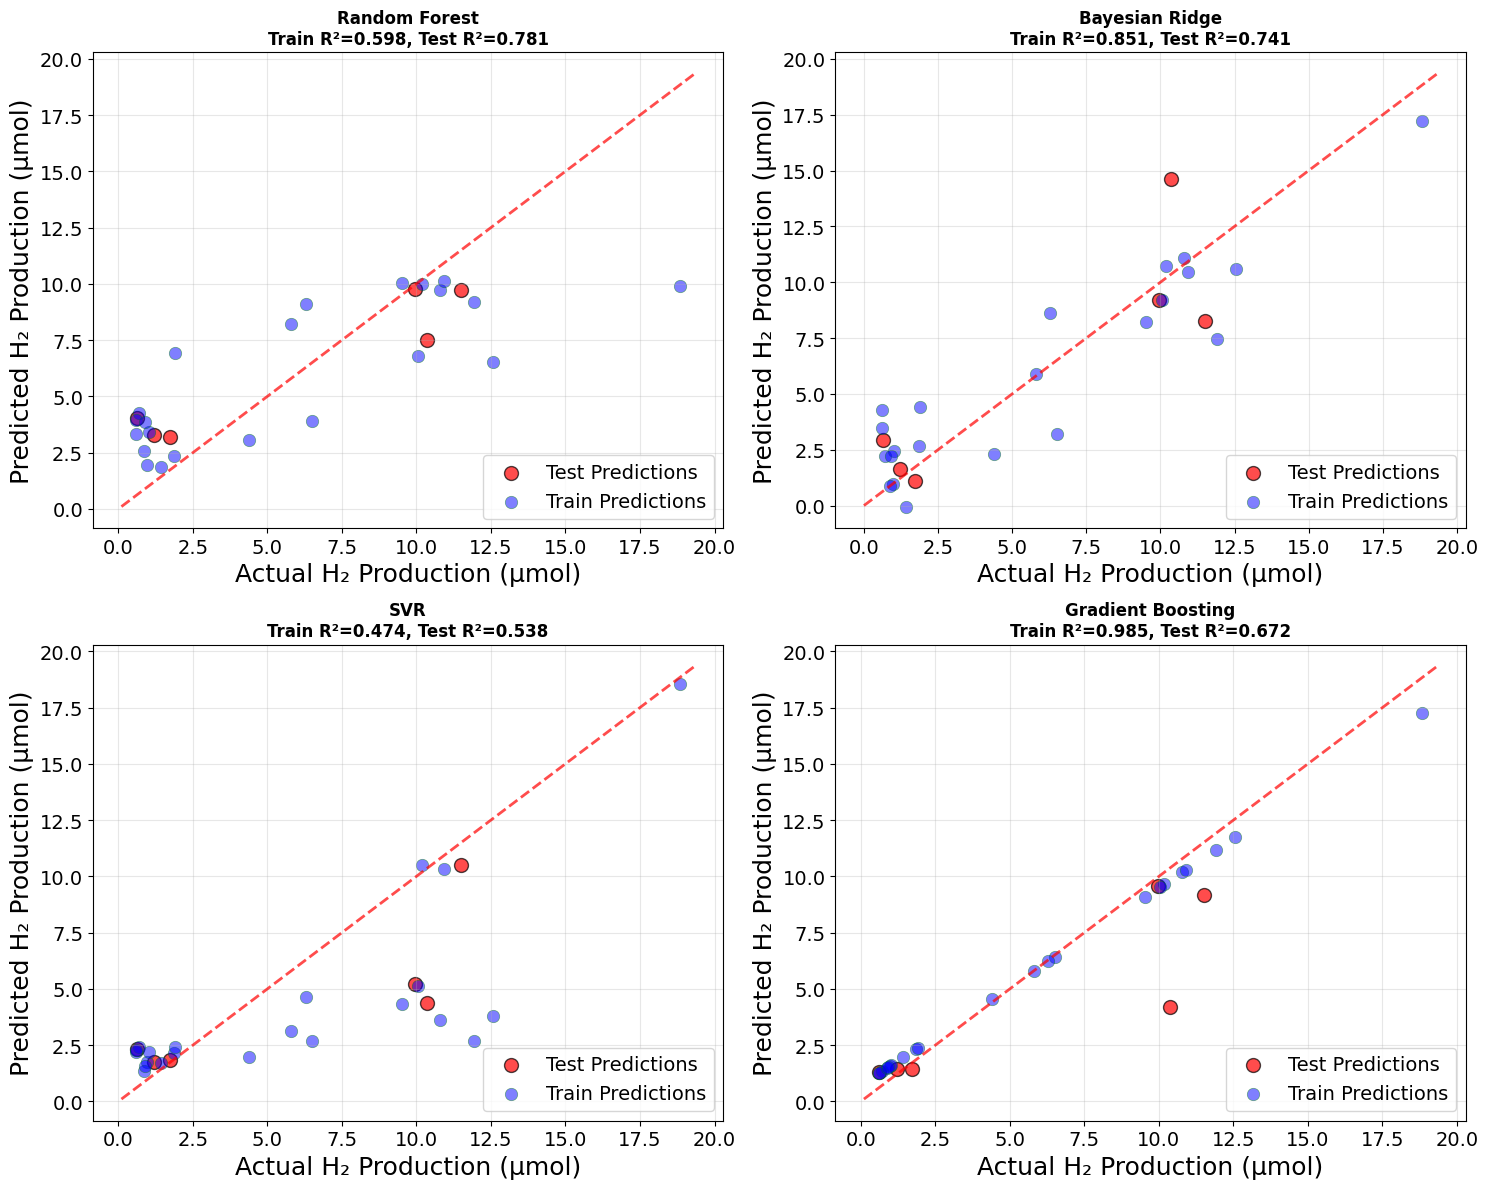


Model Performance Summary (Alternative Approach - No SFS):
Model                | Train R² |  Test R² |   LOO Q² |      MAE |     RMSE
Random Forest        |    0.598 |    0.781 |    0.279 |     1.96 |     2.22
SVR                  |    0.474 |    0.538 |  -58.329 |     2.34 |     3.23
Gradient Boosting    |    0.985 |    0.672 |    0.223 |     1.69 |     2.72
Bayesian Ridge       |    0.851 |    0.741 |    0.604 |     1.94 |     2.41


In [28]:
# 6. Model validation and visualization for alternative approach (without feature selection)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

desired_order = ['Random Forest', 'Bayesian Ridge', 'SVR', 'Gradient Boosting']

for idx, model_name in enumerate(desired_order):
    if model_name not in results_alt:
        continue
    
    result = results_alt[model_name]
    y_train_pred = result['y_train_pred']
    y_test_pred = result['y_test_pred']
    train_r2 = result['train_r2']
    test_r2 = result['test_r2']
    loo_q2 = result['loo_q2']
    test_mae = result['test_mae']
    test_rmse = result['test_rmse']
    
    # Actual vs Predicted
    axes[idx].scatter(y_test_alt, y_test_pred, color='red', alpha=0.7, s=100, 
                     label='Test Predictions', edgecolors='black', linewidth=1)
    axes[idx].scatter(y_train_alt, y_train_pred, color='blue', alpha=0.5, s=80,
                     label='Train Predictions', edgecolors='green', linewidth=0.5)
    
    axes[idx].set_xlabel('Actual H₂ Production (μmol)', fontsize=18)
    axes[idx].set_ylabel('Predicted H₂ Production (μmol)', fontsize=18)
    axes[idx].set_title(f'{model_name}\nTrain R²={train_r2:.3f}, Test R²={test_r2:.3f}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(loc='lower right')

    # Perfect prediction line
    all_vals = np.concatenate([y_train_alt, y_test_alt, y_train_pred, y_test_pred])
    min_val = max(0, all_vals.min() - 0.5)
    max_val = all_vals.max() + 0.5
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', alpha=0.7, linewidth=2, label='Perfect Prediction')
    
    # Add metrics
    # axes[idx].text(0.05, 0.95, f'Test MAE: {test_mae:.2f}\nTest RMSE: {test_rmse:.2f}', 
    #                transform=axes[idx].transAxes, verticalalignment='top',
    #                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
    #                fontsize=10)

plt.tight_layout()
plt.show()

# Print summary comparison
print("\nModel Performance Summary (Alternative Approach - No SFS):")
print("=" * 80)
print(f"{'Model':<20} | {'Train R²':>8} | {'Test R²':>8} | {'LOO Q²':>8} | {'MAE':>8} | {'RMSE':>8}")
print("=" * 80)
for model_name, result in results_alt.items():
    print(f"{model_name:<20} | {result['train_r2']:8.3f} | {result['test_r2']:8.3f} | {result['loo_q2']:8.3f} | {result['test_mae']:8.2f} | {result['test_rmse']:8.2f}")